### Objective
This project aims to predict customer churn and identify key drivers contributing to churn. The insights will enable the business to implement effective retention strategies, improving customer satisfaction and revenue.

### Business Problem
Customer retention is crucial for any subscription-based business. Understanding why customers leave (churn) helps reduce costs associated with acquiring new customers and enhances customer lifetime value.

### Dataset Overview
The dataset contains 2,000 rows and 16 columns, including features like `age`, `weekly_mins_watched`, and the target variable `churn`. The data spans customers' demographic details, usage patterns, and interaction with customer support.


In [2]:
# import library 

import pandas as pd
import numpy as np               
import seaborn as sns             
import matplotlib.pyplot as plt


In [7]:
df= pd.read_csv('customer_churn_data.csv')
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [8]:
#checking the row x columns of dataframe forther understanding of data
df.shape


(2000, 16)

In [9]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [6]:
#Null values: (Manually Checking Null/Missing Values)

#gender- (2000- 1976)= 24 columns
#max_day_inactive- (2000- 1972)= 28 columns
#churn - (2000- 1965)= 35 columns

In [7]:
#Lets verify this:

col_missing_values=df.isna().sum()
print(col_missing_values)

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64


In [8]:
# Total Missing Values are:

total_missing_values = df.isna().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing_values}")

Total missing values in the DataFrame: 87


Columns having missing/ NaN values are:
- gender
- maximum_days_inactive
- churn


In [9]:

# Lets check the descriptive statistical information
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


###### From above data:
- All data entries are from the year 2015.
- **Important**: The std dev of a column is 0, If the std of a column is 0, then all the data in that column is same and we can **delete** that column.
----
- The dataset includes 2000 unique customer IDs.
- The average age of customers is approximately 38.69 years.
- Ages range from min 18 to max 82 years, with a standard deviation of 10.21 years, showing a fairly broad age distribution.
----
- On average, customers are subscribed for about 99.75 days ~approx 3 months 10 days.
- The subscription duration varies significantly, from 1 to 243 days, with a standard deviation of around 39.76 days.
----
- Customers watch an average of 270.18 minutes weekly.
- The watching time ranges from 0 to 526.20 minutes, indicating some customers watch very little or no content while others watch a lot.
- The standard deviation is 80.55 minutes, indicating considerable variation in watching time.
----
- The minimum daily watching time averages 10.20 minutes.
- This metric varies from 0 to 20 minutes, with a standard deviation of about 2.79 minutes.
----
- The maximum daily watching time averages 30.62 minutes.
- This ranges from 0 to 59.64 minutes, with a standard deviation of approximately 9.13 minutes.
----
- On average, customers watch about 100.42 minutes at night per week.
- This metric ranges from 42 to 175 minutes, with a standard deviation of 19.53 minutes.
----
- Customers watch an average of 4.48 videos.
- The number of videos watched ranges from 0 to 19, with a standard deviation of 2.49.
----
- On average, customers are inactive for about 3.25 days.
- The inactivity period ranges from 0 to 6 days, with a standard deviation of 0.81 days.
----
- Customers make an average of 1.55 support calls.
- The number of support calls ranges from 0 to 9, with a standard deviation of 1.32.
----
- The churn rate is about 13.33% (mean of 0.1333), indicating the proportion of customers who have churned.



In [10]:
# As Year column standard dev is 0 so no use of so lets delete this 

df.drop(['year'],axis=1,inplace=True)
df.drop(['phone_no'],axis=1,inplace=True)
df

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [11]:
#Lets check the numerical statistical information, where we can get some more information:
df.describe(include='O')

,gender,multi_screen,mail_subscribed
count,1976,2000,2000
unique,2,2,2
top,Male,no,no
freq,1053,1802,1430


- In (df.describe())>> gender column having some null or missing value are there.
- Male, NO Multi screen category and not subscribe most frequently showing in quantify the no.

In [12]:
df['churn'].unique()
# 1.0 => customers that unsubscribe/ subscription lapse
# 0.0 => Customers that stay/ continue subscription

array([ 0.,  1., nan])

In [13]:
df

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [15]:
df[df.duplicated()]

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [16]:
# Get the unique values for each column

col_unique_values = df.nunique()
col_unique_values

customer_id               1999
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [18]:
# Get the overall unique values in the DataFrame
total_unique_values = df.nunique().sum()
print(f"Total unique values in the DataFrame: {total_unique_values}")

Total unique values in the DataFrame: 5090


- Lets check each column unique values: as multiple column are there >
- Instead of manually checking the unique value lets run a for loop::

In [19]:
for i in df.columns:
    unique_values = df[i].unique()
    print(f"Unique values for column '{i}': {unique_values}")
    print()  

Unique values for column 'customer_id': [100198 100643 100756 ... 998474 998934 999961]

Unique values for column 'gender': ['Female' nan 'Male']

Unique values for column 'age': [36 39 65 24 40 31 54 61 34 30 23 21 44 45 59 57 32 50 28 37 63 33 35 52
 48 55 41 43 38 26 29 27 56 49 47 42 67 46 64 66 22 51 25 62 53 19 76 60
 58 75 20 74 77 82 80 71 73 18 70 72 69 68 79]

Unique values for column 'no_of_days_subscribed': [ 62 149 126 131 191  65  59  50 205  63 114 107  84 142 137 100  99 115
 194 104 170  76  94  81 119 138 124  48 106 161  89 105  67 129  56  95
  37  80 190 168 166  42  96  77  54  41  53  98  90 146  51  97  55  74
  86  75  27 163  44  92  45 140 122 132 103 134 109  21 167  35 177 118
  87 135 144 148  70  16  83  72  30  93  91 110 128  66  38  64 172  82
  39 108 162  10 156 101  68 111 112 127  61 158 192 136 116  49  40 130
 125   9  57  88 151 113  58  79 179  17 117 152 159 155  43 123   5 186
 139  19 147  34  73 121  78 153 171  85  29 102 165  36 150  31 2

- From the above loop we can concludes there are 4 categorical columns:
    - Gender
    - Multi_screen
    - Mail_subscribed
    - Churn  

In [20]:
df['gender'].value_counts(dropna=False, normalize=True) 
# here data are in float value ensure to check in %age wise:
df_gender = df['gender'].value_counts(dropna=False, normalize=True) * 100
df_gender = df_gender.apply(lambda x: f"{x:.2f}%")

print(df_gender)

gender
Male      52.65%
Female    46.15%
NaN        1.20%
Name: proportion, dtype: object


In [21]:
df['multi_screen'].value_counts()

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [22]:
df['multi_screen'].value_counts(dropna=False)

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [23]:
df_multiscreen= df['multi_screen'].value_counts(dropna=False, normalize=True) *100
df_multiscreen = df_multiscreen.apply(lambda x: f"{x:.2f}%")

print(df_multiscreen)

multi_screen
no     90.10%
yes     9.90%
Name: proportion, dtype: object


In [24]:
df['mail_subscribed'].value_counts(dropna=False)

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

In [25]:
df_mailsubscrib=df['mail_subscribed'].value_counts(dropna=False, normalize=True) * 100
df_mailsubscrib = df_mailsubscrib.apply(lambda x: f"{x:.2f}%")

print(df_mailsubscrib)

mail_subscribed
no     71.50%
yes    28.50%
Name: proportion, dtype: object


In [26]:
df['churn'].value_counts(dropna=False)

churn
0.0    1703
1.0     262
NaN      35
Name: count, dtype: int64

In [27]:
df['churn'].value_counts(dropna=False, normalize=True) * 100

churn
0.0    85.15
1.0    13.10
NaN     1.75
Name: proportion, dtype: float64

In [28]:
df_gender=df['gender'].value_counts(dropna=False,normalize=True)*100
df_gender= df_gender.apply(lambda x: f"{x:.2f}%")
df_gender

gender
Male      52.65%
Female    46.15%
NaN        1.20%
Name: proportion, dtype: object

#### Handling null values:

- Fill the values
    - For the numerical columns, we can fill the missing values with the mean/median of that columm
    - For the categorical columns, we can fill the missing values with mode, least frequent value, or a new category
- Delete the row(s)
    - we should avoid deleting the rows as much as possible because it reduces the data
- Delete the column(s)
    - if any columns has more than 30-40% values missing, then we can delete that column
    - this 30-40% value is NOT a hard rule. It can vary depending on the column, data, use case and requirement

In [29]:
#filling the missing value from NaN to Female as more than 52% already male are there 
# so we can assumed based on probabilities that it can be Female as we can't make 3rd
# catagories as Null, so will check mode for female categories.

df.gender.fillna('Female',inplace=True)

C:\Users\parik\AppData\Local\Temp\ipykernel_22384\3722026739.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gender.fillna('Female',inplace=True)


In [30]:
col_missing_values=df.isna().sum()
print(col_missing_values)

customer_id                0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64


In [31]:
med_value = int(df.maximum_days_inactive.median())
print(med_value)
#Replacing the median value where NaN/Null value  
df.maximum_days_inactive.fillna(3, inplace=True)

3


C:\Users\parik\AppData\Local\Temp\ipykernel_22384\2103129594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.maximum_days_inactive.fillna(3, inplace=True)


In [32]:
med_val_churn= int(df.churn.median())
#filling the missing values in the Churn column
df.churn.fillna(0, inplace=True)

C:\Users\parik\AppData\Local\Temp\ipykernel_22384\3265946467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.churn.fillna(0, inplace=True)


In [33]:
df.isnull().sum()

customer_id               0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [34]:
df

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,Female,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [35]:
# Churn rate Analysis 

churn_rate = df['churn'].mean() * 100
print(f'Churn Rate: {churn_rate:.2f}%')


Churn Rate: 13.10%


In [36]:
# Lets understand the weekly watched analysis by Gender

df.groupby('gender')['weekly_mins_watched'].mean()

gender
Female    269.628881
Male      270.672650
Name: weekly_mins_watched, dtype: float64

In [37]:
# Lets understand the weekly watched analysis by Gender

df.groupby('gender')['weekly_mins_watched'].mean()

gender
Female    269.628881
Male      270.672650
Name: weekly_mins_watched, dtype: float64

In [38]:
#Lets filter out how many are having subscription 
subsc= df[df['churn'] == 0]
subsc

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
6,103051,Female,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,996524,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,0.0
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,Female,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0


In [39]:
#Lets filter out how many are not having subscription expired 
unsubsc= df[df['churn'] == 1]
unsubsc

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
5,101953,Female,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
7,103225,Female,40,50,no,no,196.65,5.6,22.29,88,9,3.0,5,1.0
18,107251,Male,39,115,no,no,367.50,13.7,41.65,124,8,4.0,1,1.0
22,108519,Female,45,76,no,no,395.10,11.4,44.78,101,5,4.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,968500,Male,36,101,no,no,134.55,13.5,15.25,93,11,4.0,5,1.0
1936,971483,Female,37,208,no,no,489.75,10.7,55.51,102,6,3.0,2,1.0
1940,971989,Female,33,125,yes,no,280.95,9.6,31.84,112,2,3.0,0,1.0
1959,979909,Male,29,144,no,no,417.75,11.6,47.35,90,5,4.0,1,1.0


In [40]:
#comparison of Subscriber and unsubsriber 
df['churn'].value_counts(dropna=False, normalize=True) * 100

churn
0.0    86.9
1.0    13.1
Name: proportion, dtype: float64

In [41]:
df['total_minutes_watched'] = df['weekly_mins_watched'] + df['weekly_max_night_mins']
print(df.head())
df

   customer_id  gender  age  no_of_days_subscribed multi_screen  \
0       100198  Female   36                     62           no   
1       100643  Female   39                    149           no   
2       100756  Female   65                    126           no   
3       101595  Female   24                    131           no   
4       101653  Female   40                    191           no   

  mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0              no               148.35                12.2   
1              no               294.45                 7.7   
2              no                87.30                11.9   
3             yes               321.30                 9.5   
4              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89           

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,total_minutes_watched
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,230.35
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,381.45
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,178.30
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,423.30
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,326.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0,279.25
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,389.45
1997,998474,Female,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,238.85
1998,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0,278.05


In [42]:
# Average age of churned vs. non-churned customers
print(df.groupby('churn')['age'].mean())

churn
0.0    38.643843
1.0    39.000000
Name: age, dtype: float64


In [43]:
# Average number of days subscribed for churned vs. non-churned customers
print(df.groupby('churn')['no_of_days_subscribed'].mean())


churn
0.0     99.711162
1.0    100.007634
Name: no_of_days_subscribed, dtype: float64


In [44]:
# Average number of days subscribed for churned vs. non-churned customers
print(df.groupby('churn')['no_of_days_subscribed'].mean())


churn
0.0     99.711162
1.0    100.007634
Name: no_of_days_subscribed, dtype: float64


In [45]:
# Average weekly minutes watched for churned vs. non-churned customers
print(df.groupby('churn')['weekly_mins_watched'].mean())

churn
0.0    265.085731
1.0    303.961260
Name: weekly_mins_watched, dtype: float64


In [46]:
df.fillna({'gender': df['gender'].mode().iloc[0], 
           'maximum_days_inactive': df['maximum_days_inactive'].median(),
          'churn': df['churn'].value_counts().idxmin()})

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,total_minutes_watched
0,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,230.35
1,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,381.45
2,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,178.30
3,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,423.30
4,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,326.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0,279.25
1996,998086,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,389.45
1997,998474,Female,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,238.85
1998,998934,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0,278.05


In [47]:
# Lets see the average weekly min watched by gender:

pivot_table = df.pivot_table(index='gender', columns='churn', values='weekly_mins_watched', aggfunc='mean')
print(pivot_table)


churn          0.0         1.0
gender                        
Female  264.395788  303.112500
Male    265.700598  304.772015


Text(0.5, 1.0, 'Gender Distribution')

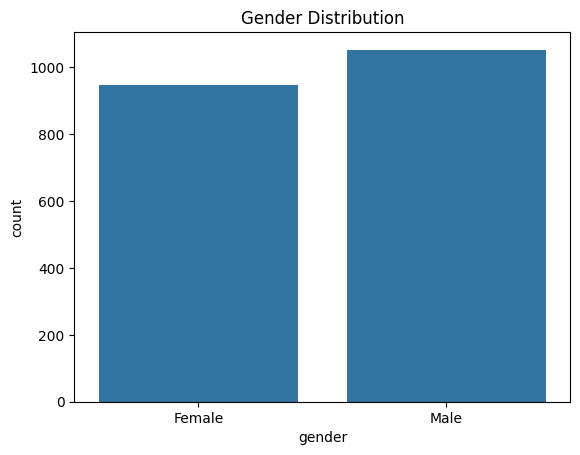

In [48]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

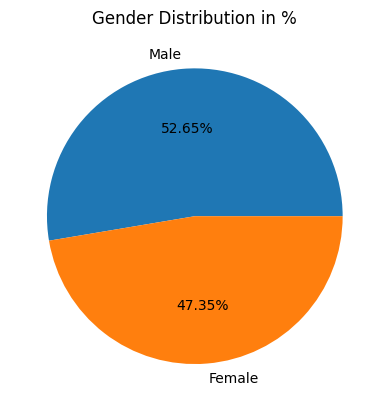

In [49]:
plt.pie(df['gender'].value_counts(),
       labels=df['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.title('Gender Distribution in %')
plt.show()

In [50]:
df_gender=df['gender'].value_counts(dropna=False,normalize=True)*100
df_gender= df_gender.apply(lambda x: f"{x:.2f}%")
df_gender

gender
Male      52.65%
Female    47.35%
Name: proportion, dtype: object

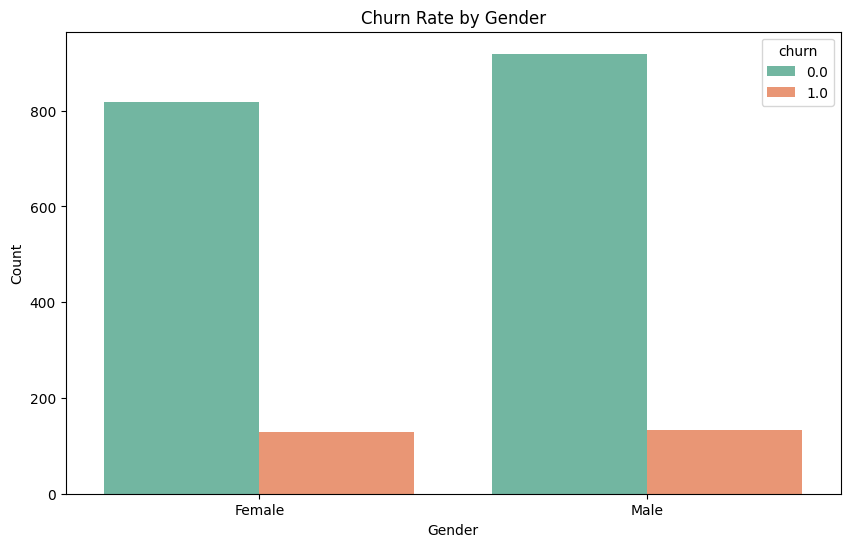

In [51]:
#Gender and Churn
#Exploring the churn rate by gender

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='churn', data=df, palette='Set2')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


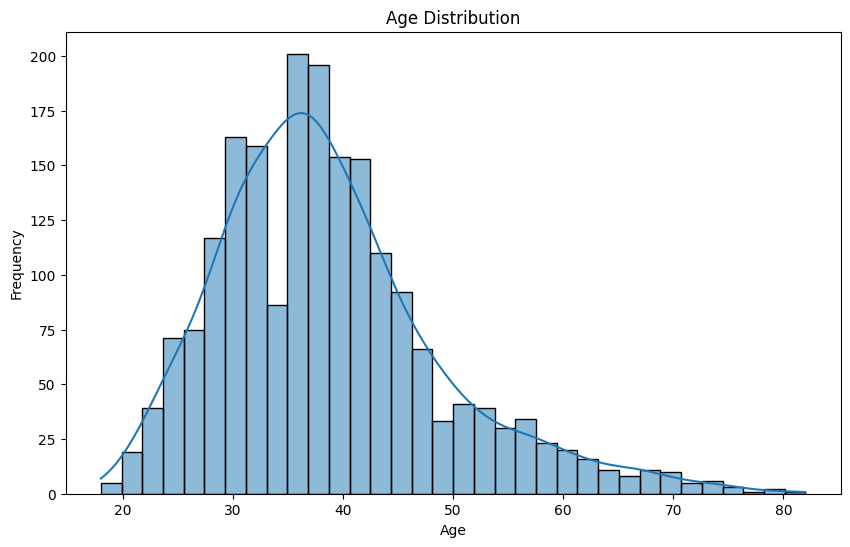

In [52]:
# Distribution of age

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

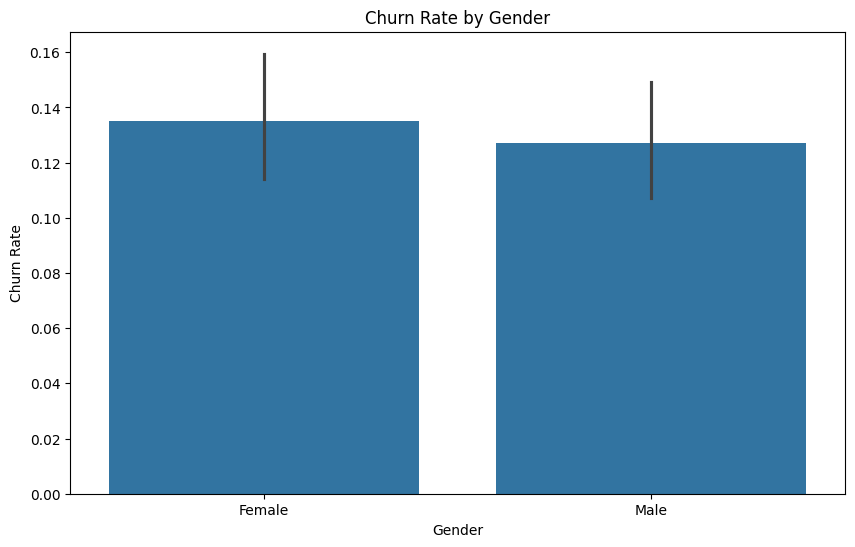

In [53]:
# Churn rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

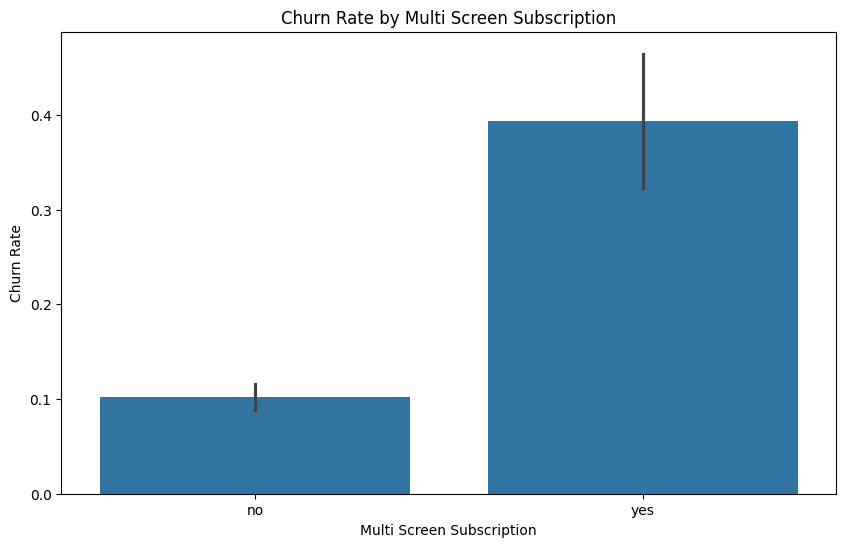

In [54]:
# Churn rate by multi_screen
plt.figure(figsize=(10, 6))
sns.barplot(x='multi_screen', y='churn', data=df)
plt.title('Churn Rate by Multi Screen Subscription')
plt.xlabel('Multi Screen Subscription')
plt.ylabel('Churn Rate')
plt.show()

In [55]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1200x800 with 0 Axes>

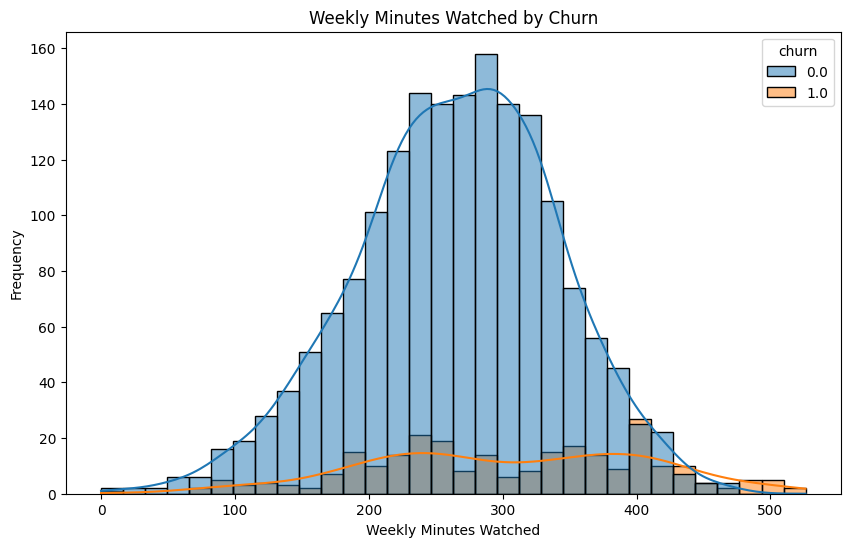

In [56]:
#Churn by Weekly Minutes Watched
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='weekly_mins_watched', hue='churn', kde=True)
plt.title('Weekly Minutes Watched by Churn')
plt.xlabel('Weekly Minutes Watched')
plt.ylabel('Frequency')
plt.show()

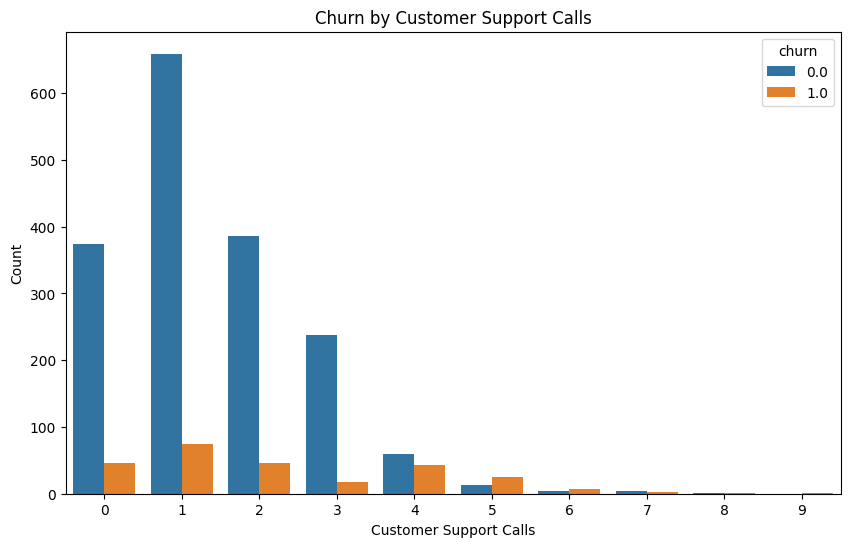

In [57]:
# Churn By Cust. supports call
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_support_calls', hue='churn')
plt.title('Churn by Customer Support Calls')
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.show()


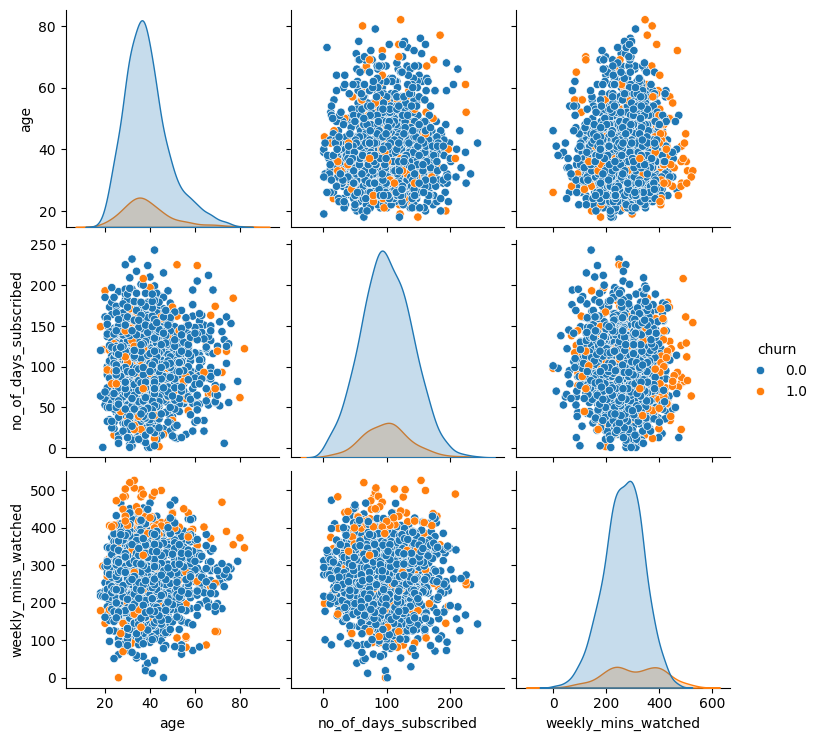

In [58]:
#Pair Plot for Selected Features
selected_features = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'churn']
sns.pairplot(df[selected_features], hue='churn')
plt.show()


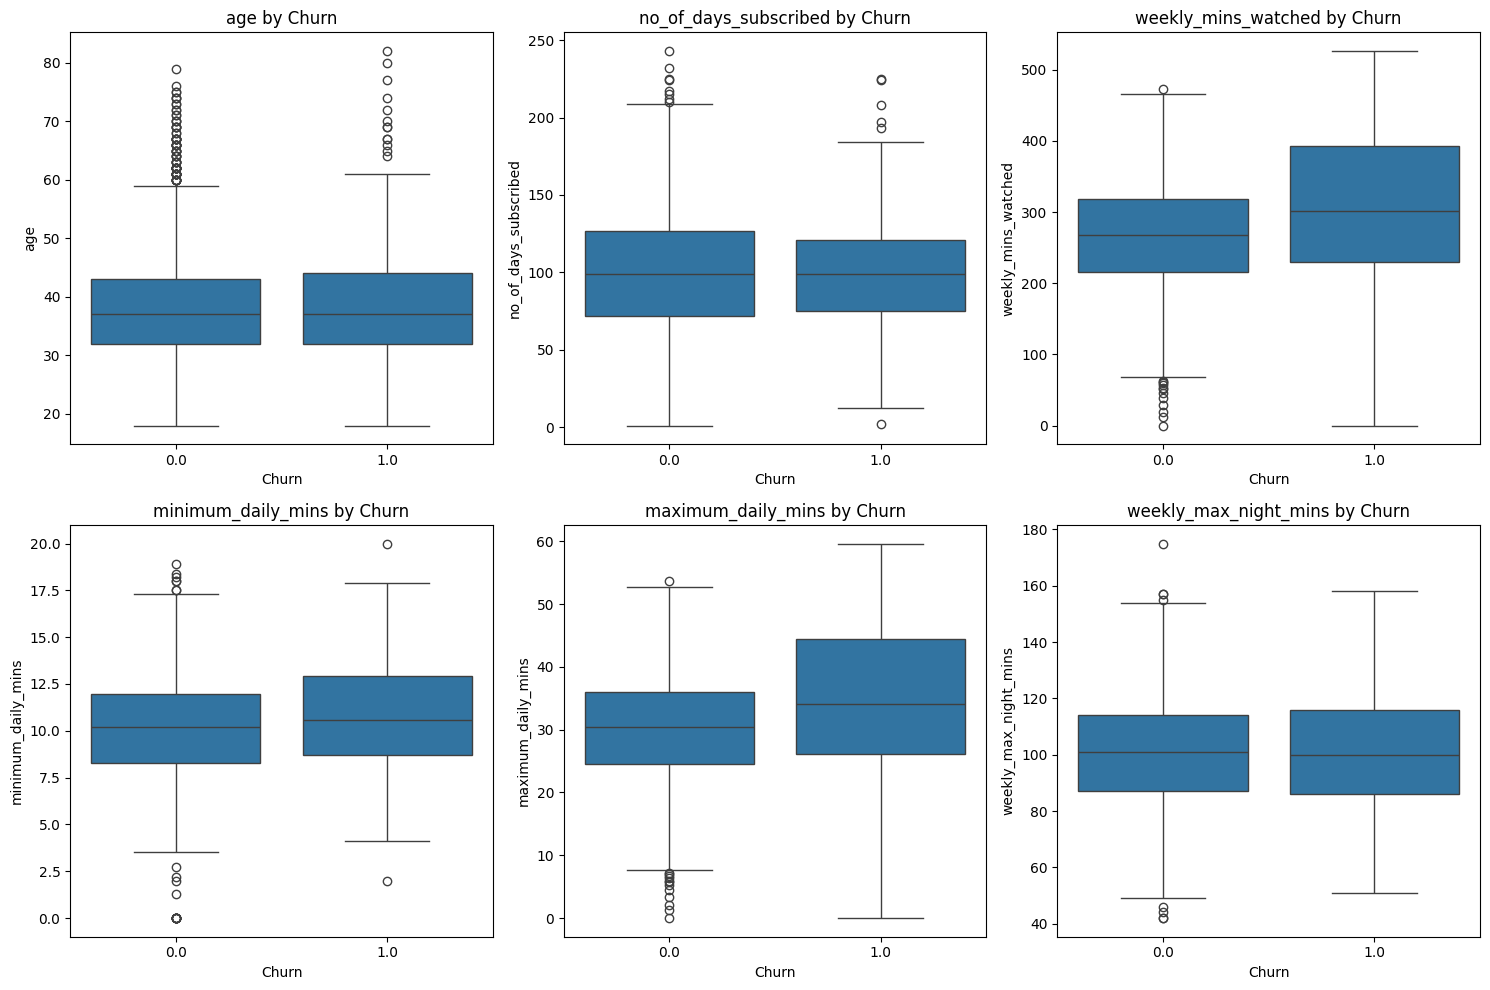

In [59]:
#Box Plot continuous variables for churned vs. non-churned customers 
continuous_features = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


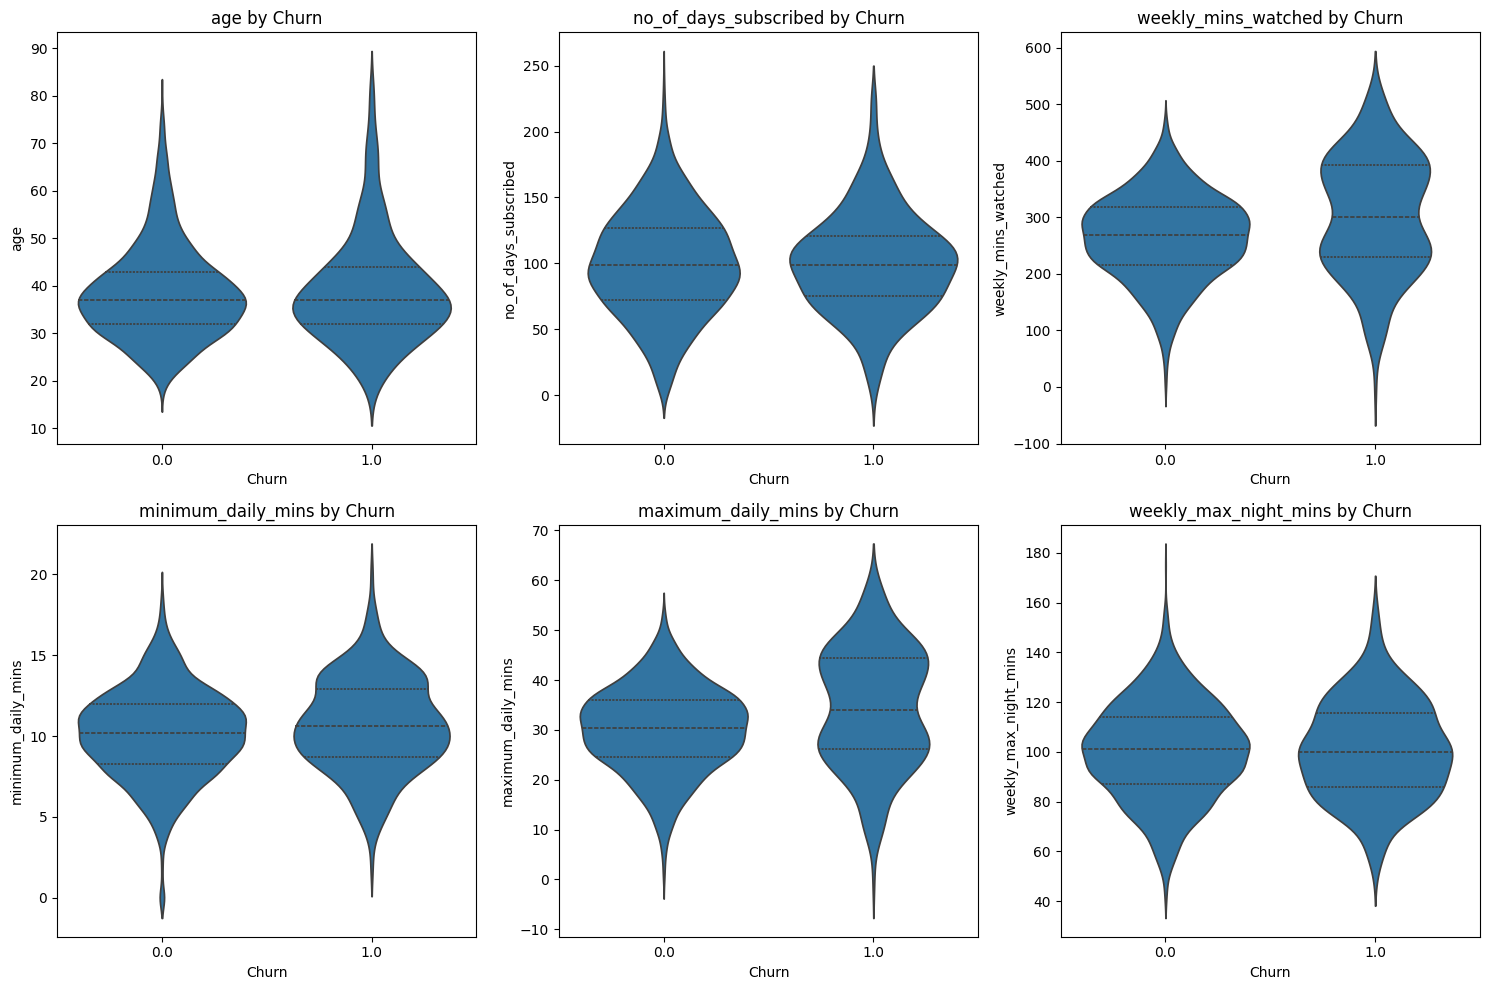

In [60]:
# Violin plots combine the benefits of box plots and KDE plots
#the distribution of the data across different churn categories.

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='churn', y=feature, data=df, inner='quartile')
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



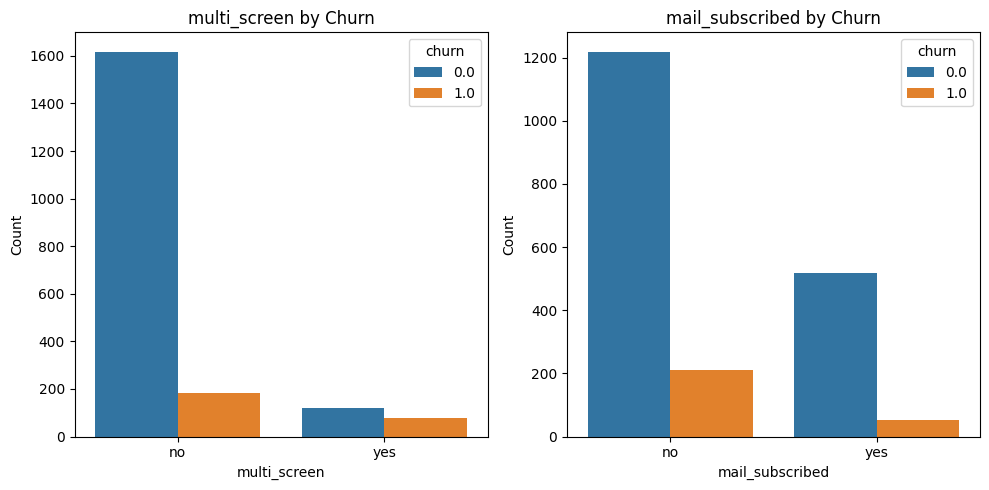

In [61]:
#Analysis of Categorical Variables
#Let's analyze the relationship between categorical variables such as multi_screen, mail_subscribed, and churn.
# Count Plots- Count plots can help us understand the distribution of 
# categorical variables across churned and non-churned customers.

categorical_features = ['multi_screen', 'mail_subscribed']

plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'{feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


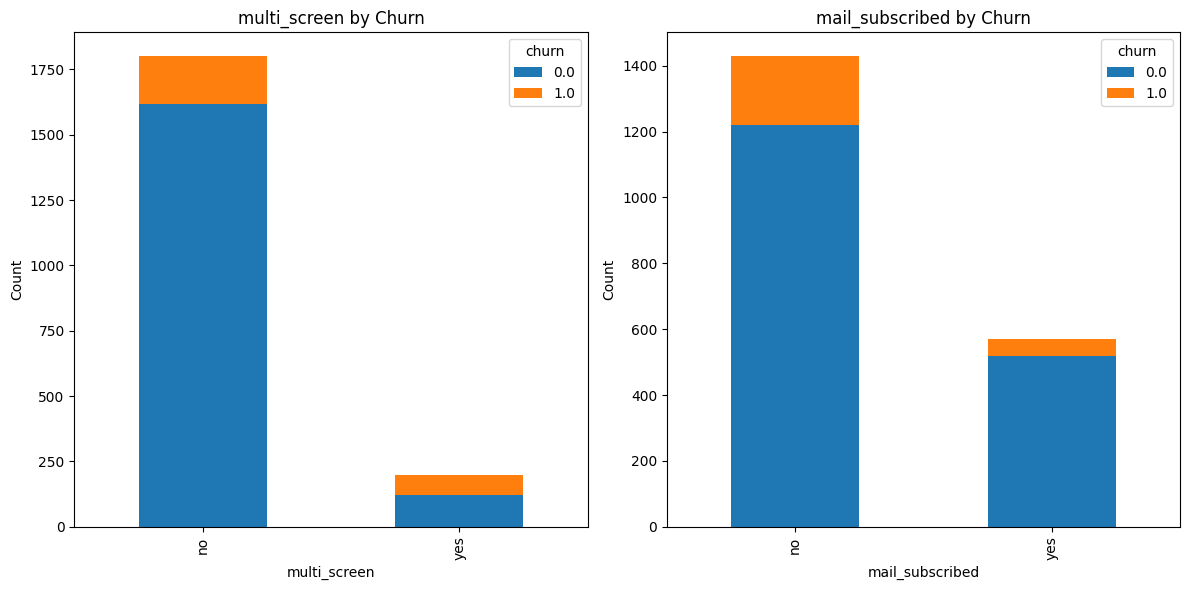

In [62]:
#Stacked Bar Plots
#Stacked bar plots show the proportion of churn within each category.

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    churn_counts = df.groupby([feature, 'churn']).size().unstack()
    churn_counts.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


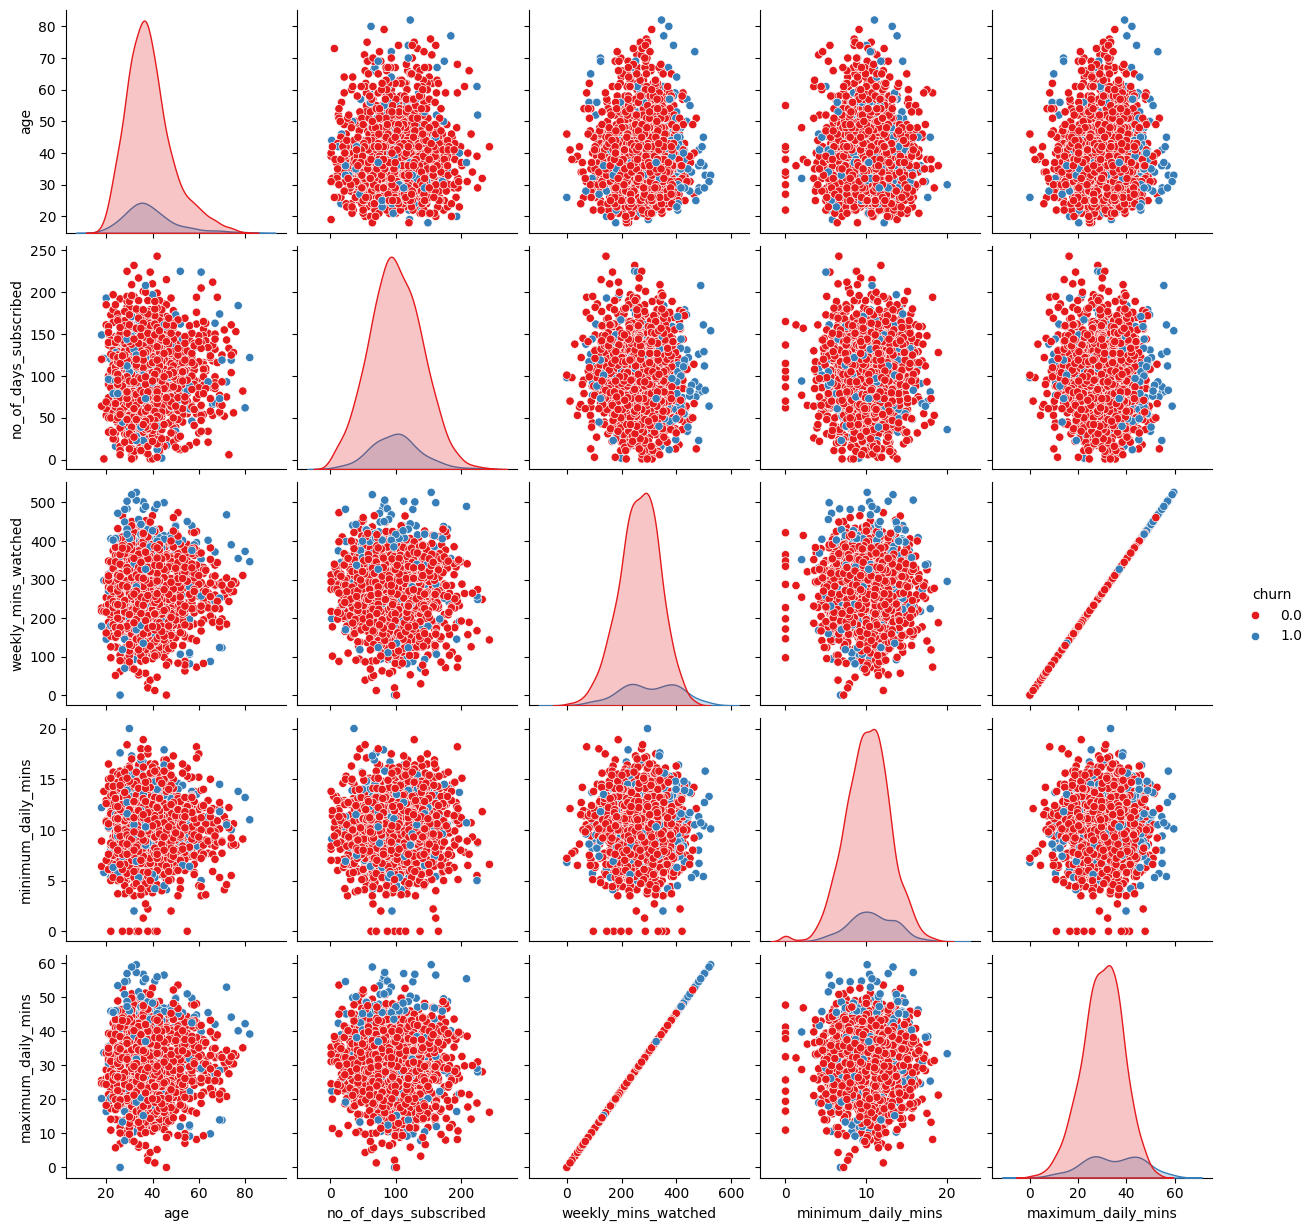

In [63]:
#Using pair plots to visualize pairwise relationships between features for churned and non-churned customers.

selected_features = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'churn']
sns.pairplot(df[selected_features], hue='churn', palette='Set1', diag_kind='kde')
plt.show()

In [64]:
# Calculate correlation with churn
correlation_with_churn = df.corr()['churn'].sort_values(ascending=False)
print(correlation_with_churn)

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='viridis')
plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.show()


ValueError: could not convert string to float: 'Female'

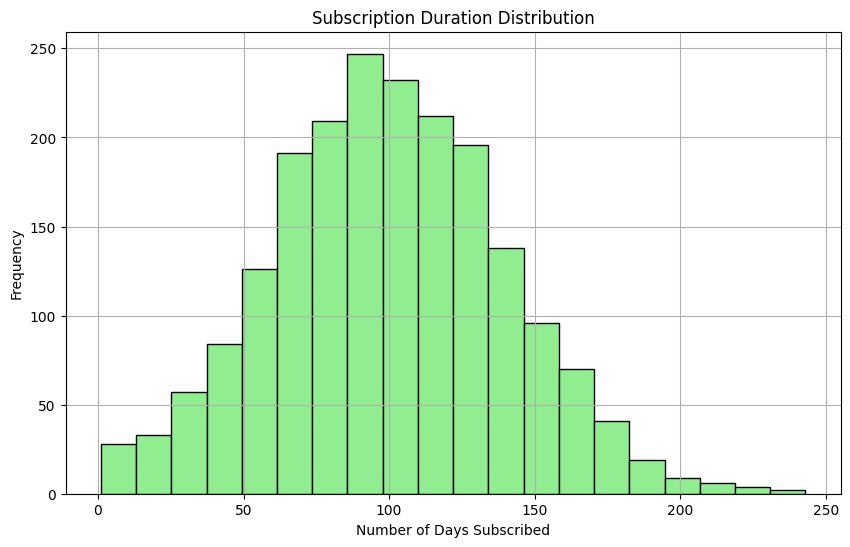

In [65]:
#Subscription Duration Analysis
#Analyzing the duration of subscriptions can provide insights into 
#how long customers typically remain subscribed

plt.figure(figsize=(10, 6))
df['no_of_days_subscribed'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Subscription Duration Distribution')
plt.xlabel('Number of Days Subscribed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


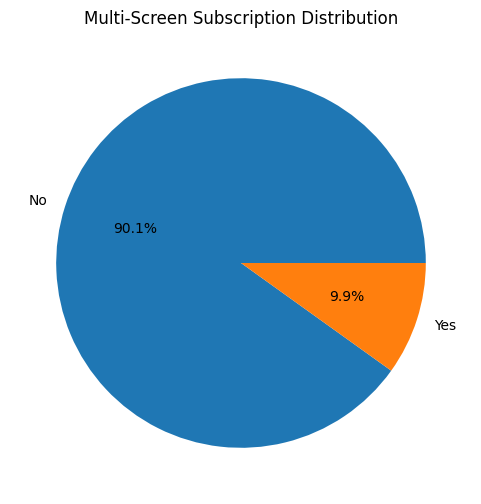

In [66]:
#Multi-Screen Subscription Analysis
#Checking the proportion of customers who have multi-screen subscriptions.
plt.figure(figsize=(6, 6))
plt.pie(df['multi_screen'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Multi-Screen Subscription Distribution')
plt.show()


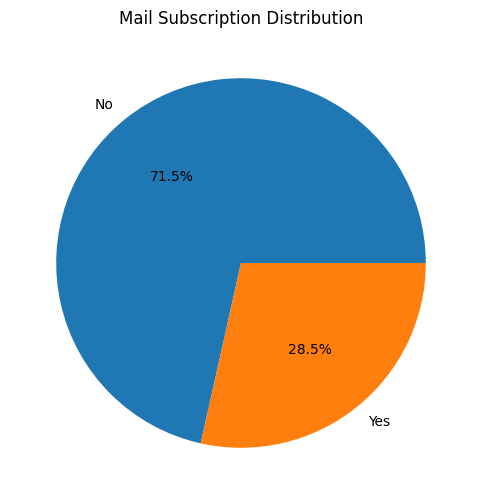

In [67]:
#Mail Subscription Analysis
#Analyzing the proportion of customers who have subscribed to email notifications.


plt.figure(figsize=(6, 6))
plt.pie(df['mail_subscribed'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Mail Subscription Distribution')
plt.show()


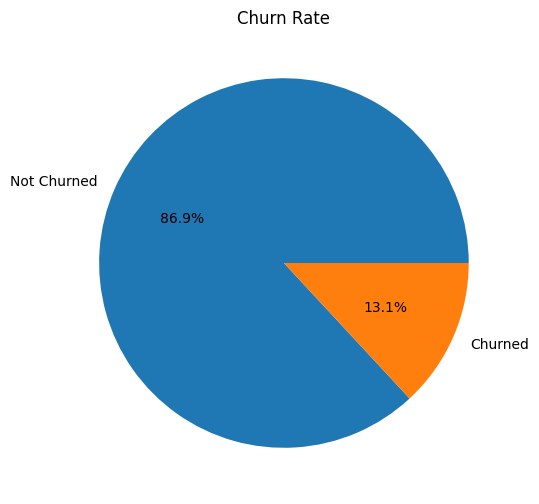

In [68]:
#Churn Rate Analysis
#Understanding the churn rate in your customer base.

plt.figure(figsize=(6, 6))
plt.pie(df['churn'].value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()


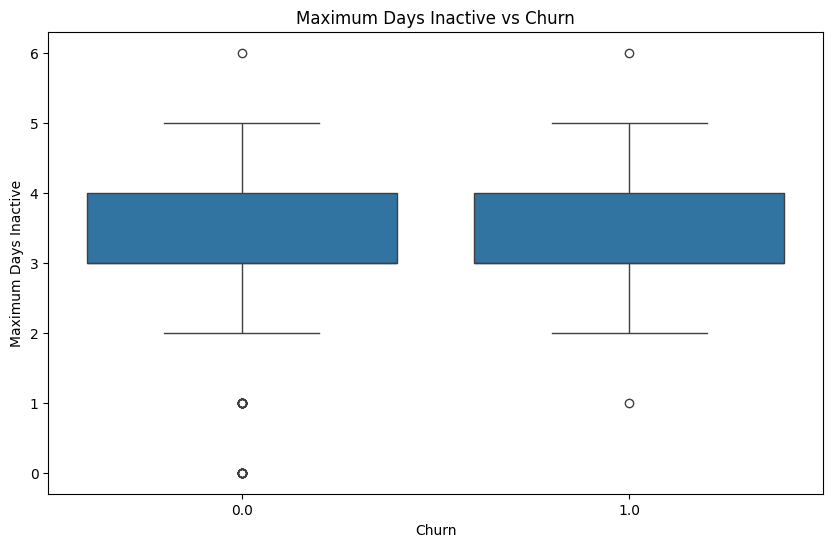

In [69]:
#Relationship Between Maximum Days Inactive and Churn
#Exploring the relationship between the number of maximum days a customer was inactive and whether they churned.

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='maximum_days_inactive', data=df)
plt.title('Maximum Days Inactive vs Churn')
plt.xlabel('Churn')
plt.ylabel('Maximum Days Inactive')
plt.show()


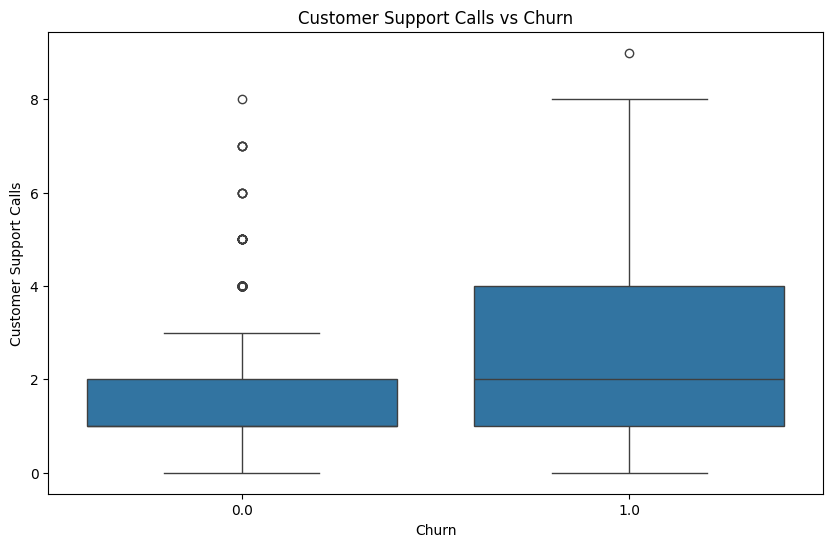

In [70]:
#Customer Support Calls and Churn
#Analyzing the relationship between the number of customer support calls and churn.

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer_support_calls', data=df)
plt.title('Customer Support Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Support Calls')
plt.show()


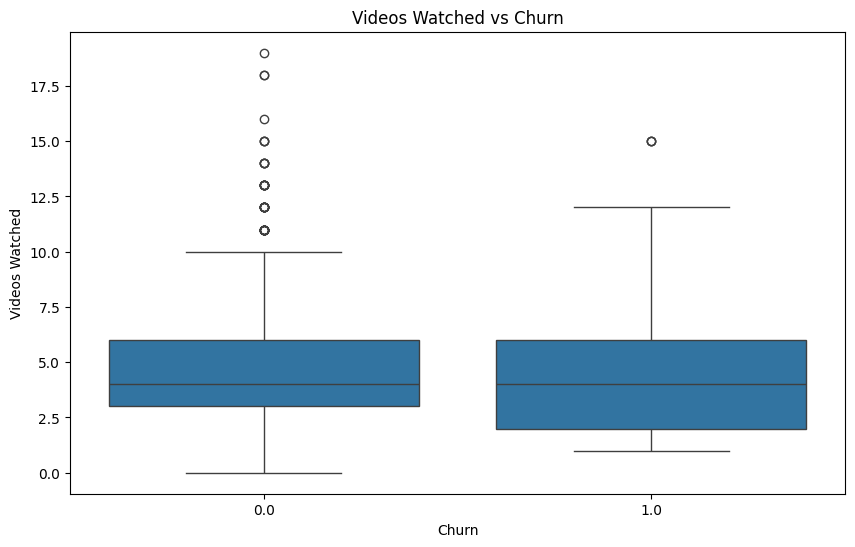

In [71]:
#Videos Watched and Churn
#Examining the relationship between the number of videos watched and churn.

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='videos_watched', data=df)
plt.title('Videos Watched vs Churn')
plt.xlabel('Churn')
plt.ylabel('Videos Watched')
plt.show()


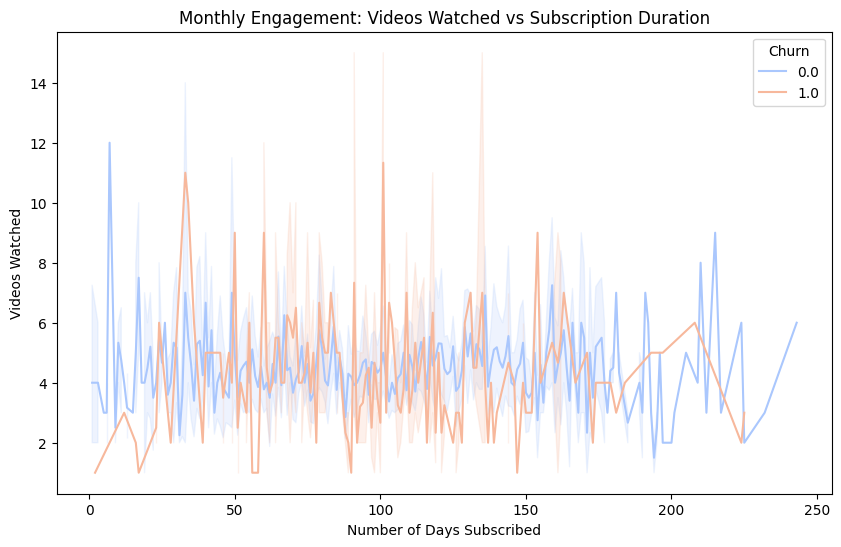

In [72]:
#Monthly Engagement Analysis
#Analyzing the monthly engagement of users by looking at the number of videos watched.

plt.figure(figsize=(10, 6))
sns.lineplot(x='no_of_days_subscribed', y='videos_watched', hue='churn', data=df, palette='coolwarm')
plt.title('Monthly Engagement: Videos Watched vs Subscription Duration')
plt.xlabel('Number of Days Subscribed')
plt.ylabel('Videos Watched')
plt.legend(title='Churn')
plt.show()


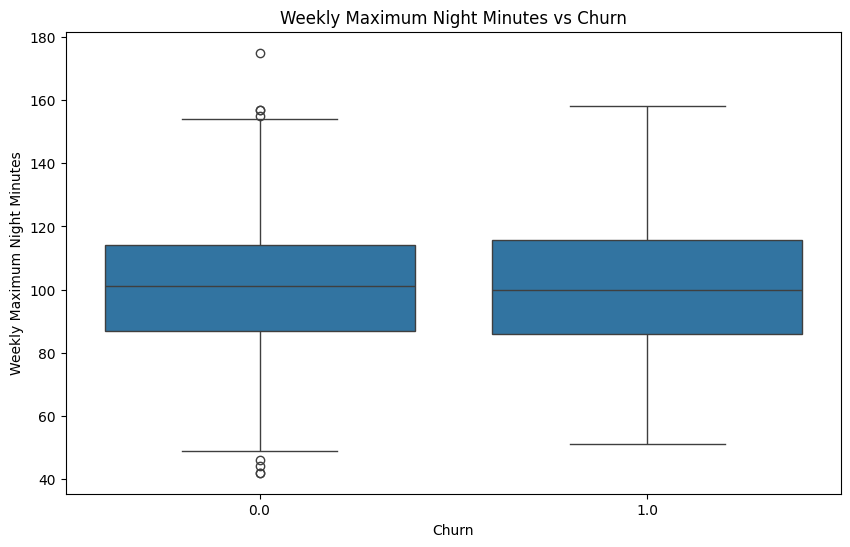

In [73]:
#Weekly Maximum Night Minutes and Churn
#Examining the relationship between the maximum night minutes watched in a week and churn.

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='weekly_max_night_mins', data=df)
plt.title('Weekly Maximum Night Minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('Weekly Maximum Night Minutes')
plt.show()
